In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics
from google.colab import files
from sklearn.metrics import roc_curve, auc, roc_auc_score
import warnings
warnings.filterwarnings("ignore")

In [7]:
data = files.upload()


Saving Student Mental health (1).csv to Student Mental health (1).csv


In [13]:
data = pd.read_csv ("Student Mental health (1).csv")

In [14]:
data.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [15]:
data_types = data.dtypes

print(data_types)

Timestamp                                        object
Choose your gender                               object
Age                                             float64
What is your course?                             object
Your current year of Study                       object
What is your CGPA?                               object
Marital status                                   object
Do you have Depression?                          object
Do you have Anxiety?                             object
Do you have Panic attack?                        object
Did you seek any specialist for a treatment?     object
dtype: object


In [16]:
data.sample

<bound method NDFrame.sample of                Timestamp Choose your gender   Age What is your course?  \
0         8/7/2020 12:02             Female  18.0          Engineering   
1         8/7/2020 12:04               Male  21.0    Islamic education   
2         8/7/2020 12:05               Male  19.0                  BIT   
3         8/7/2020 12:06             Female  22.0                 Laws   
4         8/7/2020 12:13               Male  23.0         Mathemathics   
..                   ...                ...   ...                  ...   
96   13/07/2020 19:56:49             Female  21.0                  BCS   
97   13/07/2020 21:21:42               Male  18.0          Engineering   
98   13/07/2020 21:22:56             Female  19.0             Nursing    
99   13/07/2020 21:23:57             Female  23.0     Pendidikan Islam   
100  18/07/2020 20:16:21               Male  20.0   Biomedical science   

    Your current year of Study What is your CGPA? Marital status  \
0          

In [17]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
96     False
97     False
98     False
99     False
100    False
Length: 101, dtype: bool

In [18]:
data.info

<bound method DataFrame.info of                Timestamp Choose your gender   Age What is your course?  \
0         8/7/2020 12:02             Female  18.0          Engineering   
1         8/7/2020 12:04               Male  21.0    Islamic education   
2         8/7/2020 12:05               Male  19.0                  BIT   
3         8/7/2020 12:06             Female  22.0                 Laws   
4         8/7/2020 12:13               Male  23.0         Mathemathics   
..                   ...                ...   ...                  ...   
96   13/07/2020 19:56:49             Female  21.0                  BCS   
97   13/07/2020 21:21:42               Male  18.0          Engineering   
98   13/07/2020 21:22:56             Female  19.0             Nursing    
99   13/07/2020 21:23:57             Female  23.0     Pendidikan Islam   
100  18/07/2020 20:16:21               Male  20.0   Biomedical science   

    Your current year of Study What is your CGPA? Marital status  \
0          

In [19]:
data.columns

Index(['Timestamp', 'Choose your gender', 'Age', 'What is your course?',
       'Your current year of Study', 'What is your CGPA?', 'Marital status',
       'Do you have Depression?', 'Do you have Anxiety?',
       'Do you have Panic attack?',
       'Did you seek any specialist for a treatment?'],
      dtype='object')

In [20]:
#drop NA value
data= data[data['Age'].notna()]
data.shape

(100, 11)

In [21]:
data.head(1)

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No


In [22]:
#Rename columns
data.columns = ['Timestamp', 'Gender', 'Age', 'Course', 'Year', 'CGPA', 'Marital_Status', 'Depression', 'Anxiety', 'Panic_Attack', 'Treatment']
data.head(1)

,Timestamp,Gender,Age,Course,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No


In [23]:
#Formatting the Year column
data['Year'].unique()
# array(['year 1', 'year 2', 'Year 1', 'year 3', 'year 4', 'Year 2', 'Year 3'], dtype=object)

array(['year 1', 'year 2', 'Year 1', 'year 3', 'year 4', 'Year 2',
       'Year 3'], dtype=object)

In [24]:
def Clean(Text):
    Text = Text[-1]
    Text = int(Text)
    return Text
data["Year"] = data["Year"].apply(Clean)
print("First three values of Year after cleaning text:")
print(data["Year"][:3], "\n")

First three values of Year after cleaning text:
0    1
1    2
2    1
Name: Year, dtype: int64 



In [25]:
data['CGPA'].unique()

array(['3.00 - 3.49', '3.50 - 4.00', '3.50 - 4.00 ', '2.50 - 2.99',
       '2.00 - 2.49', '0 - 1.99'], dtype=object)

In [26]:
def remove_space(string):
    string = string.strip()
    return string
data["CGPA"] = data["CGPA"].apply(remove_space)
print("First three values of CGPA after cleaning text:")
print(data["CGPA"][:3], "\n")
print(data['CGPA'].unique())

First three values of CGPA after cleaning text:
0    3.00 - 3.49
1    3.00 - 3.49
2    3.00 - 3.49
Name: CGPA, dtype: object 

['3.00 - 3.49' '3.50 - 4.00' '2.50 - 2.99' '2.00 - 2.49' '0 - 1.99']


In [27]:
len(data['Course'].unique())

49

In [28]:
#Let's replace redundant course name with the standard course name
data['Course'].replace({'engin': 'Engineering' , 'Engine':'Engineering' , 'Islamic education':'Islamic Education' , 'Pendidikan islam':'Pendidikan Islam' , 'BIT':'IT', 'psychology':'Psychology', 'koe': 'Koe', 'Kirkhs': 'Irkhs', 'KIRKHS': 'Irkhs', 'Benl': 'BENL', 'Fiqh fatwa ': 'Fiqh', 'Laws': 'Law'} , inplace = True)
len(data['Course'].unique())

37

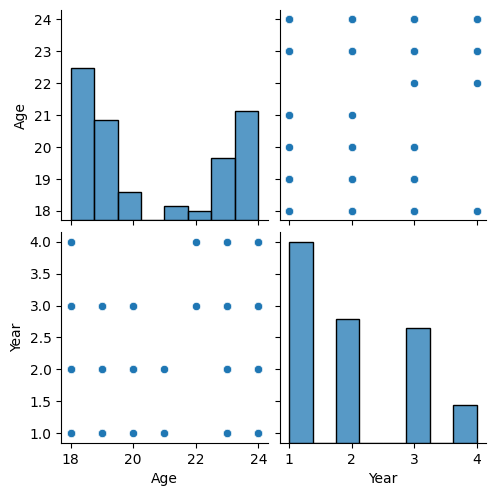

In [29]:
sns.pairplot(data)

[Text(0, 0, 'Engineering'),
 Text(1, 0, 'IT'),
 Text(2, 0, 'BCS'),
 Text(3, 0, 'Irkhs'),
 Text(4, 0, 'Psychology'),
 Text(5, 0, 'Banking Studies'),
 Text(6, 0, 'ALA'),
 Text(7, 0, 'BENL'),
 Text(8, 0, 'CTS'),
 Text(9, 0, 'Econs'),
 Text(10, 0, 'Malcom'),
 Text(11, 0, 'Biomedical science'),
 Text(12, 0, 'KOE'),
 Text(13, 0, 'Radiography'),
 Text(14, 0, 'Islamic Education')]

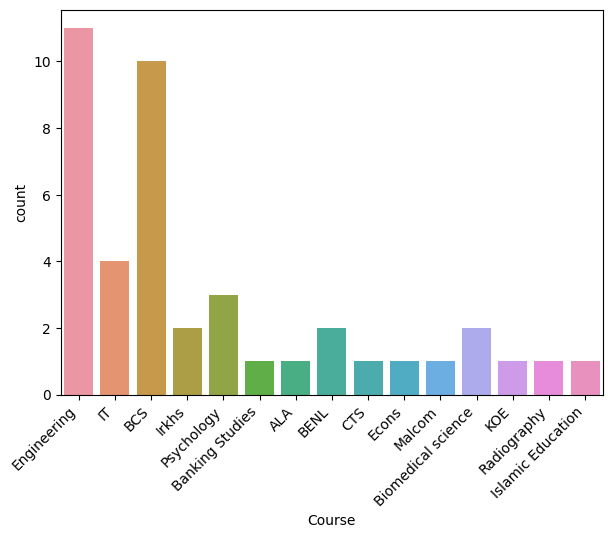

In [40]:
plt.figure(figsize=(7, 5))
chart = sns.countplot(x = 'Course', data = data[data['Year'] == 1])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

[Text(0, 0, 'Islamic Education'),
 Text(1, 0, 'Engineering'),
 Text(2, 0, 'Pendidikan Islam'),
 Text(3, 0, 'Human Resources'),
 Text(4, 0, 'KENMS'),
 Text(5, 0, 'IT'),
 Text(6, 0, 'Marine science'),
 Text(7, 0, 'KOE'),
 Text(8, 0, 'Business Administration'),
 Text(9, 0, 'BCS'),
 Text(10, 0, 'Usuluddin '),
 Text(11, 0, 'TAASL'),
 Text(12, 0, 'Human Sciences '),
 Text(13, 0, 'Communication '),
 Text(14, 0, 'Diploma Nursing'),
 Text(15, 0, 'Pendidikan Islam '),
 Text(16, 0, 'Koe'),
 Text(17, 0, 'Biomedical science')]

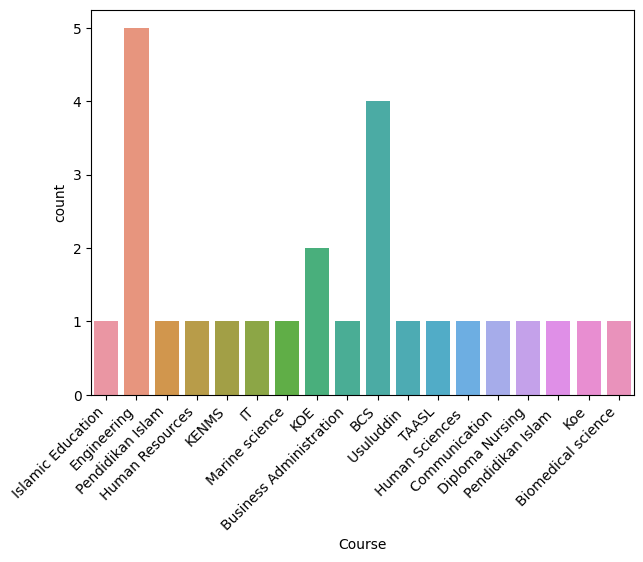

In [38]:
plt.figure(figsize=(7, 5))
chart = sns.countplot(x = 'Course', data = data[data['Year'] == 2])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

[Text(0, 0, 'Law'),
 Text(1, 0, 'Engineering'),
 Text(2, 0, 'BCS'),
 Text(3, 0, 'Accounting '),
 Text(4, 0, 'IT'),
 Text(5, 0, 'Biomedical science'),
 Text(6, 0, 'Koe'),
 Text(7, 0, 'Irkhs'),
 Text(8, 0, 'BENL'),
 Text(9, 0, 'KOE'),
 Text(10, 0, 'MHSC'),
 Text(11, 0, 'Biotechnology'),
 Text(12, 0, 'Fiqh'),
 Text(13, 0, 'DIPLOMA TESL'),
 Text(14, 0, 'Nursing ')]

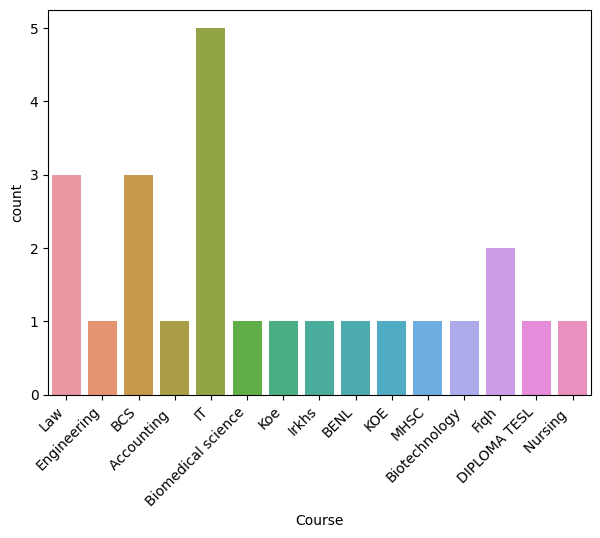

In [39]:
plt.figure(figsize=(7, 5))
chart = sns.countplot(x = 'Course', data = data[data['Year'] == 3])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

[Text(0, 0, 'Mathemathics'),
 Text(1, 0, 'ENM'),
 Text(2, 0, 'BCS'),
 Text(3, 0, 'Engineering'),
 Text(4, 0, 'Kop'),
 Text(5, 0, 'Pendidikan Islam')]

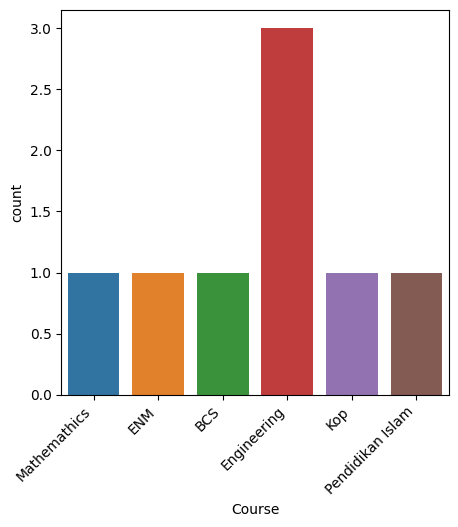

In [35]:
plt.figure(figsize=(5, 5))
chart = sns.countplot(x = 'Course', data = data[data['Year'] == 4])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

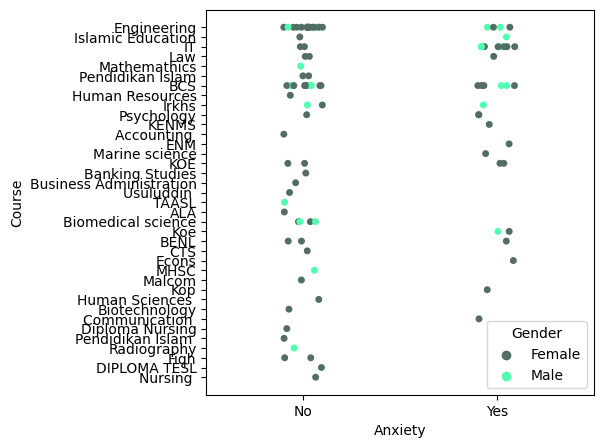

In [41]:
plt.figure(figsize=(5, 5))
sns.stripplot(x = 'Anxiety', y = 'Course', hue = 'Gender', data = data, palette = ['#546D64', '#50FFB1'])
plt.show()

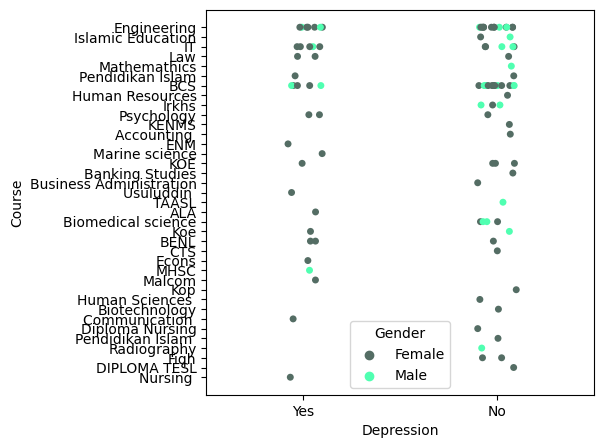

In [42]:
plt.figure(figsize=(5, 5))
sns.stripplot(x = 'Depression', y = 'Course', hue = 'Gender', data = data, palette = ['#546D64', '#50FFB1'])
plt.show()

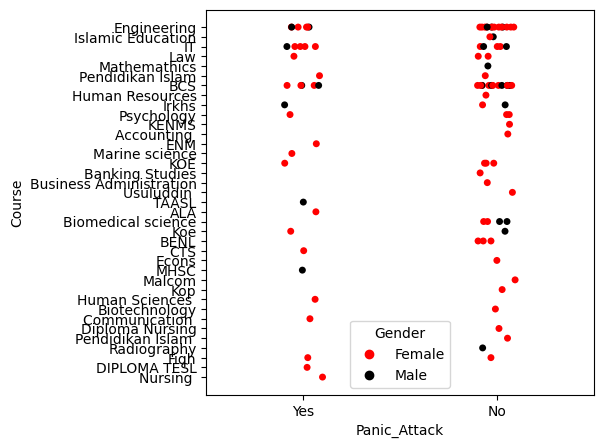

In [43]:
plt.figure(figsize=(5, 5))
sns.stripplot(x = 'Panic_Attack', y = 'Course', hue = 'Gender', data = data, palette = ['red', 'black'])
plt.show()

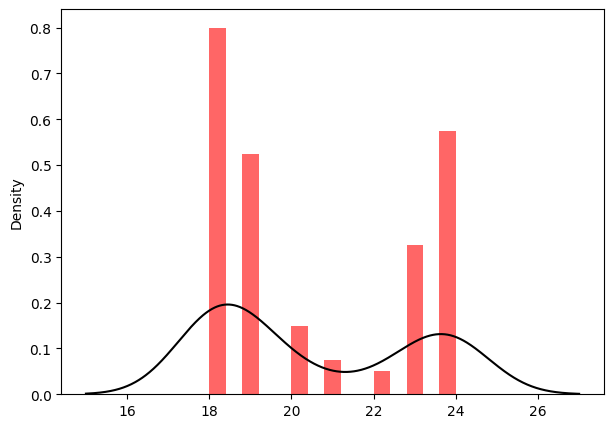

In [44]:
plt.figure(figsize=(7,5))
ax = data["Age"].hist(bins=15, density=True, stacked=True, color='red', alpha=0.6)
data["Age"].plot(kind='density', color='black')
plt.show()

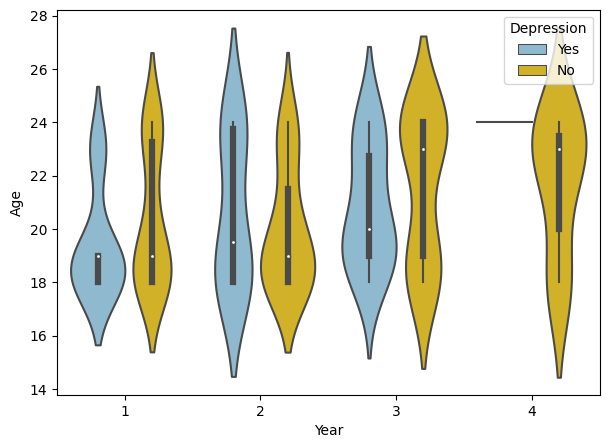

In [45]:
plt.figure(figsize=(7,5))
sns.violinplot(x = 'Year', y = 'Age', data = data,  hue = 'Depression', palette = ['#84BCDA', '#ECC30B'])
plt.show()

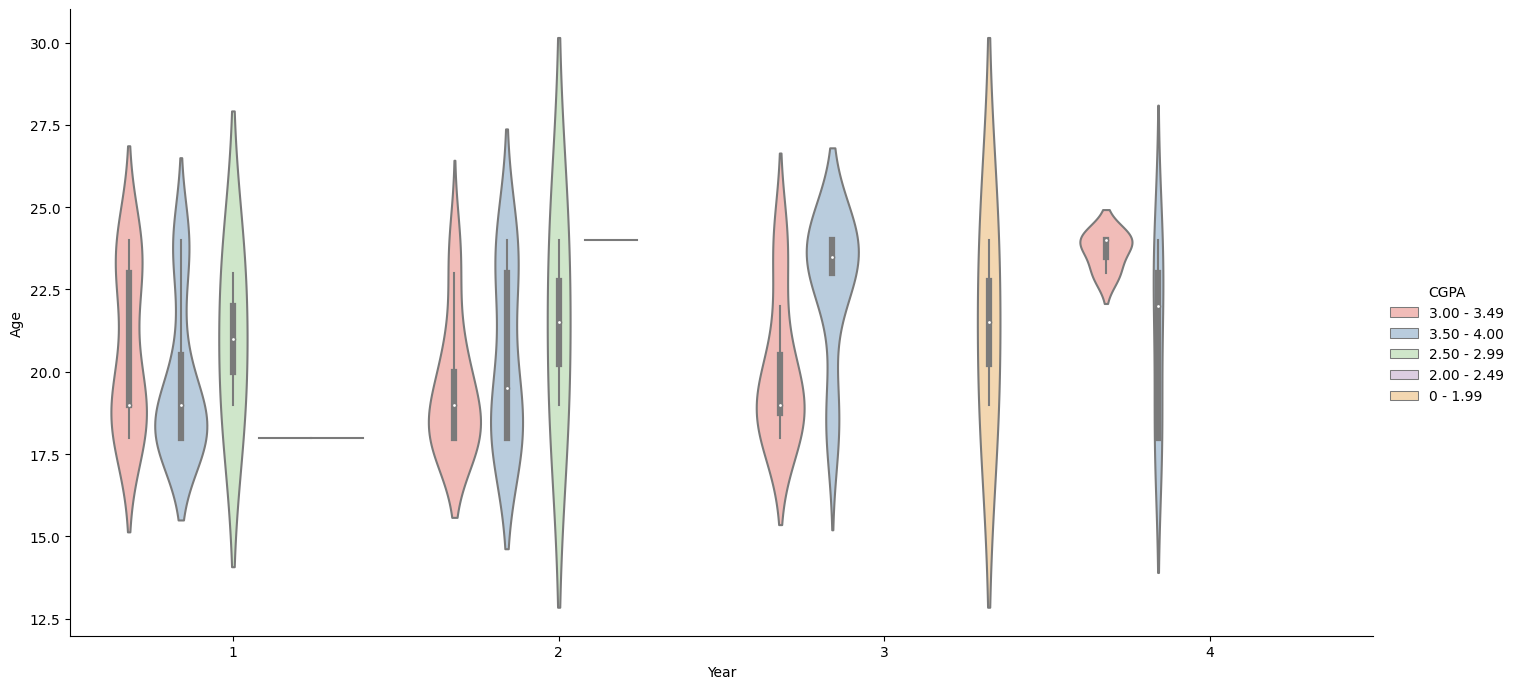

In [46]:
sns.catplot(data=data, x="Year", y="Age", hue="CGPA", kind="violin", palette="Pastel1",height=7,aspect=2)

<Axes: >

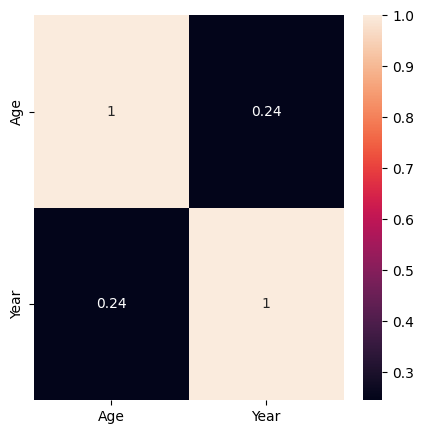

In [47]:
#correlation matrix
corrmat= data.corr()
plt.figure(figsize=(5,5))
sns.heatmap(corrmat,annot=True, cmap=None)

In [48]:
data.drop('Timestamp', axis=1, inplace=True)

In [49]:
data.head(20)

,Gender,Age,Course,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
0,Female,18.0,Engineering,1,3.00 - 3.49,No,Yes,No,Yes,No
1,Male,21.0,Islamic Education,2,3.00 - 3.49,No,No,Yes,No,No
2,Male,19.0,IT,1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,Female,22.0,Law,3,3.00 - 3.49,Yes,Yes,No,No,No
4,Male,23.0,Mathemathics,4,3.00 - 3.49,No,No,No,No,No
5,Male,19.0,Engineering,2,3.50 - 4.00,No,No,No,Yes,No
6,Female,23.0,Pendidikan Islam,2,3.50 - 4.00,Yes,Yes,No,Yes,No
7,Female,18.0,BCS,1,3.50 - 4.00,No,No,Yes,No,No
8,Female,19.0,Human Resources,2,2.50 - 2.99,No,No,No,No,No
9,Male,18.0,Irkhs,1,3.50 - 4.00,No,No,Yes,Yes,No


In [50]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
categorical_columns= [x for x in data.columns if data.dtypes[x] == 'object']
for column in categorical_columns:
    data[column] = encoder.fit_transform(data[column])
data.head()

,Gender,Age,Course,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
0,0,18.0,14,1,3,0,1,0,1,0
1,1,21.0,20,2,3,0,0,1,0,0
2,1,19.0,18,1,3,0,1,1,1,0
3,0,22.0,25,3,3,1,1,0,0,0
4,1,23.0,29,4,3,0,0,0,0,0


<Axes: >

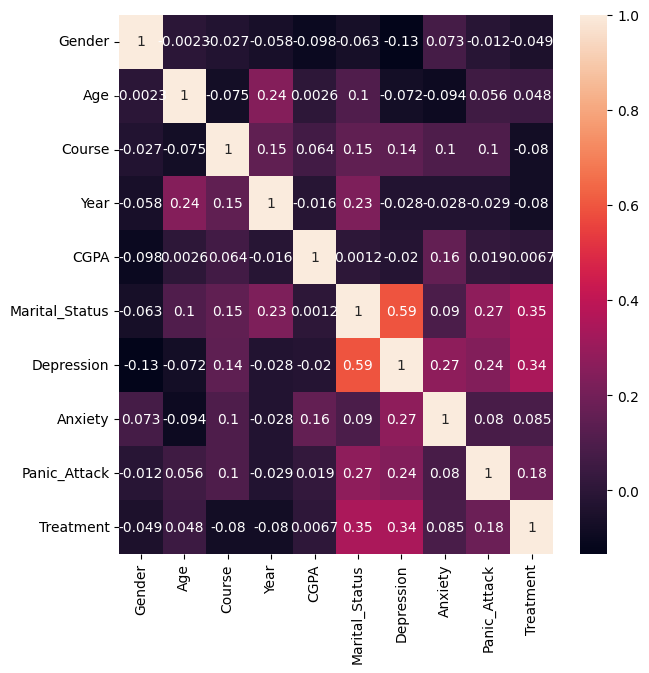

In [63]:
#correlation matrix
corrmat= data.corr()
plt.figure(figsize=(7,7))
sns.heatmap(corrmat,annot=True, cmap=None)

In [52]:
X = data.drop(["CGPA"],axis=1)
y = data["CGPA"]

In [53]:
#spliting test and training sets
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [55]:
#A quick model selection process
#pipelines of models( it is short was to fit and pred)
pipeline_lr=Pipeline([('lr_classifier',LogisticRegression(random_state=42))])

pipeline_dt=Pipeline([ ('dt_classifier',DecisionTreeClassifier(random_state=42))])

pipeline_rf=Pipeline([('rf_classifier',RandomForestClassifier())])

pipeline_svc=Pipeline([('sv_classifier',SVC())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_svc]

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest', 3: "SVC"}


# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

#cross validation on accuracy
cv_results_accuracy = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train, cv=10 )
    cv_results_accuracy.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

Logistic Regression: 0.557143 
Decision Tree: 0.471429 
RandomForest: 0.628571 
SVC: 0.500000 


In [56]:
#taking look at the test set
pred_rfc = pipeline_rf.predict(X_test)
accuracy = accuracy_score(y_test, pred_rfc)
print(accuracy)

0.43333333333333335


In [57]:
RF_model = RandomForestClassifier()
RF_model.fit(X_train, y_train)
#Testing the Model on test set
predictions=RF_model.predict(X_test)
acccuracy= accuracy_score(y_test,predictions)
acccuracy

0.5333333333333333

In [58]:
acccuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions, average="weighted")
precision = precision_score(y_test, predictions, average="weighted")
f1_score = f1_score(y_test, predictions, average="micro")

print("********* Random Forest Results *********")
print("Accuracy    : ", acccuracy)
print("Recall      : ", recall)
print("Precision   : ", precision)
print("F1 Score    : ", f1_score)

********* Random Forest Results *********
Accuracy    :  0.5333333333333333
Recall      :  0.5333333333333333
Precision   :  0.49166666666666664
F1 Score    :  0.5333333333333333


In [59]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.50      0.92      0.65        12
           4       0.62      0.36      0.45        14

    accuracy                           0.53        30
   macro avg       0.23      0.25      0.22        30
weighted avg       0.49      0.53      0.47        30



<Axes: >

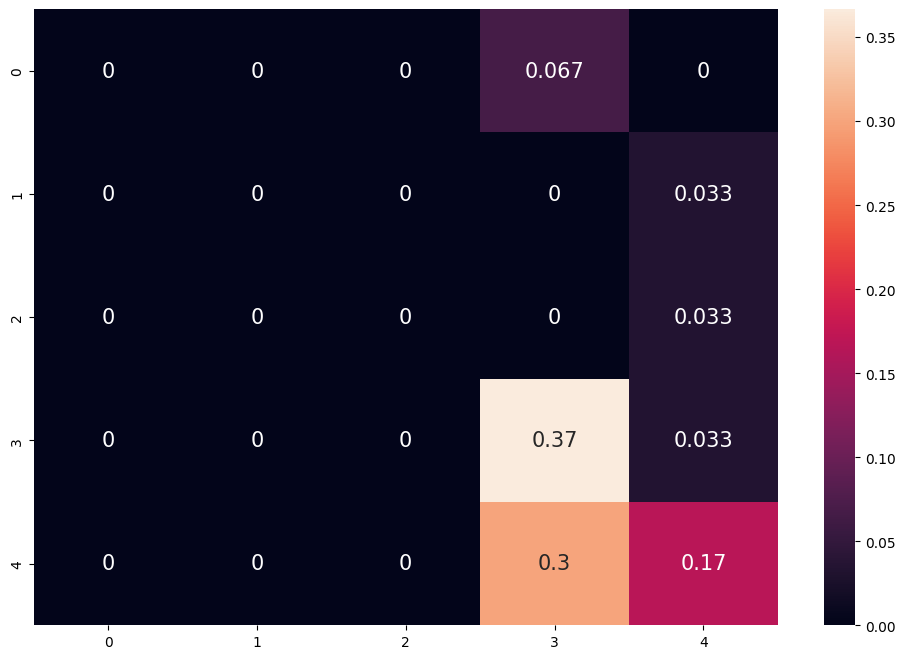

In [60]:
# confusion matrix
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap=None,annot = True, annot_kws = {'size':15})

Text(0, 0.5, 'True Positive Rate')

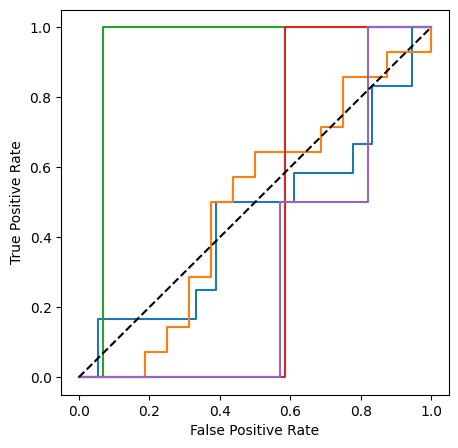

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Convert the target variable to binary format
y_train_binary = label_binarize(y_train, classes=data['CGPA'].unique())
y_test_binary = label_binarize(y_test, classes=data['CGPA'].unique())

# Create and train the model using one-vs-rest strategy
model = LogisticRegression(multi_class='ovr')
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_proba = model.predict_proba(X_test)

# Calculate the false positive rate, true positive rate, and thresholds for each class
fpr = dict()
tpr = dict()
thresholds = dict()
n_classes = y_train_binary.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_test_binary[:, i], y_pred_proba[:, i])

# Calculate the area under the ROC curve for each class
auc = dict()
for i in range(n_classes):
    auc[i] = roc_auc_score(y_test_binary[:, i], y_pred_proba[:, i])

# Plot the ROC curve for each class
plt.figure(figsize=(5, 5))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve (AUC = %0.2f)' % auc[i])

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


In [62]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate MSLE
msle = mean_squared_log_error(y_test, y_pred)
print("Mean Squared Logarithmic Error (MSLE):", msle)


Mean Absolute Error (MAE): 0.7
Mean Squared Error (MSE): 1.5666666666666667
Mean Squared Logarithmic Error (MSLE): 0.2020257124435161
